# K-Means CLUSTERING
## Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline
# para graficar
from sklearn.decomposition import PCA

## Dataset

In [ ]:
df = pd.read_csv('DatasetFinal.csv')
df.head(5)

,StockCode,Customer ID,Invoice,Description,InvoiceDate,Price,Quantity
0,2526,13085,85048,46,4839,0.882579,-0.000477
1,1127,13085,22041,2135,4839,-0.198194,0.516378
2,497,13085,21232,2727,4839,-0.387608,0.171808
3,1150,13085,22064,1988,4839,-0.298472,0.171808
4,1017,13085,21871,2378,4839,-0.387608,0.171808


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318905 entries, 0 to 318904
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    318905 non-null  int64  
 1   Customer ID  318905 non-null  int64  
 2   Invoice      318905 non-null  int64  
 3   Description  318905 non-null  int64  
 4   InvoiceDate  318905 non-null  int64  
 5   Price        318905 non-null  float64
 6   Quantity     318905 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 17.0 MB


In [ ]:
df_f3 = pd.DataFrame()

df_f3 = df.sample(n=5000, axis=0)

In [ ]:
StockCode_variable = df_f3.drop(['StockCode'], axis=1)

In [ ]:
StockCode_variable.describe()

,Customer ID,Invoice,Description,InvoiceDate,Price,Quantity
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,15517.734400,30065.796600,1600.011200,7833.580200,-0.002255,-0.006504
std,1582.319882,20248.921258,868.737622,4693.734352,1.144109,0.583668
min,12745.000000,10002.000000,0.000000,6.000000,-0.652788,-0.158405
25%,14146.000000,21530.000000,856.500000,3614.000000,-0.387608,-0.144048
50%,15571.500000,22151.500000,1546.000000,7726.500000,-0.231620,-0.115334
75%,16883.000000,22644.250000,2292.000000,11878.500000,0.169492,-0.000477
max,18287.000000,90191.000000,3075.000000,16186.000000,65.071615,20.501459


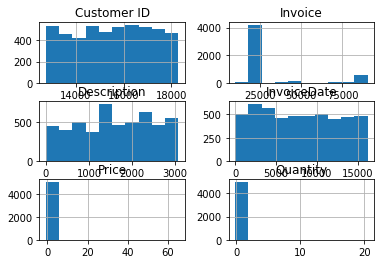

In [ ]:
StockCode_variable.hist()
plt.show()

### Corrigiendo por el valor del promedio

Los valores varían en promedio entre ellos

In [ ]:
_norm=(StockCode_variable-StockCode_variable.min())/(StockCode_variable.max()-StockCode_variable.min())
_norm

,Customer ID,Invoice,Description,InvoiceDate,Price,Quantity
275630,0.628788,0.151719,0.631545,0.176667,0.134095,0.001042
194909,0.735185,0.154387,0.500813,0.996416,0.031870,0.000000
196340,0.499158,0.154412,0.464715,0.917135,0.037883,0.000000
176195,0.815657,0.147642,0.706992,0.848483,0.218280,0.000347
122443,0.835859,0.155135,0.412033,0.674906,0.020044,0.032998
...,...,...,...,...,...,...
254237,0.837879,0.142268,0.941138,0.126614,0.007216,0.001737
191315,0.333333,0.153564,0.326829,0.940926,0.057927,0.001737
99511,0.881313,0.148078,0.597724,0.601681,0.015835,0.003821
143916,0.205051,0.151781,0.654634,0.736328,0.057927,0.000347


In [ ]:
_norm.describe()

,Customer ID,Invoice,Description,InvoiceDate,Price,Quantity
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.545039,0.246987,0.513968,0.485515,0.009768,0.003386
std,0.269477,0.247226,0.286355,0.291157,0.018531,0.017468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313910,0.143906,0.273585,0.227295,0.003832,0.000333
50%,0.554732,0.151583,0.501952,0.476276,0.006206,0.001000
75%,0.781071,0.157694,0.743331,0.737798,0.012310,0.003668
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Cantidad de cluster

In [ ]:
productos = []

for i in range(1, 12):
  kmeans = KMeans(n_clusters=1, max_iter=100)
  kmeans.fit(_norm)
  productos.append(kmeans.inertia_)

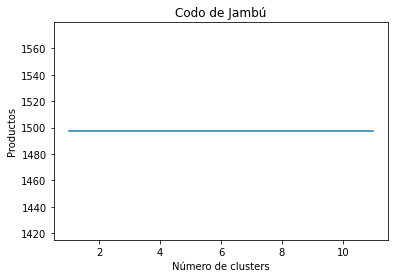

In [ ]:
plt.plot(range(1, 12), productos)
plt.title("Codo de Jambú")
plt.xlabel("Número de clusters")
plt.ylabel("Productos")
plt.show()

### K-Means a los datos

In [ ]:
clustering = KMeans(n_clusters = 2, max_iter=300)
#clustering.fit(_norm)
clustering.fit(df_f3)

KMeans(n_clusters=2)

In [ ]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=3)

### Clasificación

In [ ]:
df_f3['KMeans_Clusters'] = clustering.labels_
df_f3

,StockCode,Customer ID,Invoice,Description,InvoiceDate,Price,Quantity,KMeans_Clusters
29166,1140,14892,22054,1632,264,-0.298472,-0.057906,0
111422,145,16922,20750,2237,10311,1.105419,-0.158405,0
155258,1589,17289,22537,1565,12580,-0.572565,-0.158405,0
247104,1774,15067,22731,81,1738,-0.387608,0.114380,0
130655,2172,16791,48187,836,12412,1.002913,-0.158405,0
...,...,...,...,...,...,...,...,...
180534,1451,13001,22386,1429,13974,-0.231620,-0.029191,0
88893,805,13591,21621,2925,9173,1.227981,-0.115334,0
256327,1789,16065,22746,2092,2224,-0.198194,-0.158405,0
281811,1503,15311,22444,1267,3127,-0.387608,0.171808,0


In [ ]:
pca = PCA(n_components=2)
#pca_productos = pca.fit_transform(_norm)
pca_productos = pca.fit_transform(df_f3)
pca_productos_df = pd.DataFrame(data = pca_productos, columns = ['Col1', 'Col2'])
pca_nombres_productos = pd.concat([pca_productos_df, df_f3[['KMeans_Clusters']]], axis=1)

pca_nombres_productos

,Col1,Col2,KMeans_Clusters
0,-8115.855059,7459.896986,NaN
1,-9305.214153,-2616.698008,NaN
2,-7452.569415,-4847.799807,NaN
3,-7400.844128,6008.212011,NaN
4,18200.586533,-4323.485341,NaN
...,...,...,...
318576,NaN,NaN,0.0
318645,NaN,NaN,1.0
318727,NaN,NaN,0.0
318753,NaN,NaN,0.0


In [ ]:
pca_nombres_productos.iloc[9914]

Col1               NaN
Col2               NaN
KMeans_Clusters    1.0
Name: 318645, dtype: float64

In [ ]:
pca_nombres_productos.isnull().sum().sum()

14754

In [ ]:
pca_nombres_productos=pca_nombres_productos.dropna()

In [ ]:
pca_nombres_prod = pd.DataFrame()
pca_nombres_prod=pca_nombres_productos[['KMeans_Clusters']]
pca_nombres_prod=pca_nombres_prod.astype(int)

In [ ]:
pca_nombres_productos = pca_nombres_productos.drop(['KMeans_Clusters'], axis=1)

In [ ]:
pca_nombres_productos = pd.concat([pca_nombres_prod, pca_nombres_productos], axis=1)

In [ ]:
pca_nombres_productos

,KMeans_Clusters,Col1,Col2
16,0,-8040.196589,-3816.287454
37,0,49033.187130,-3939.246976
38,0,-8943.461762,-580.353162
151,0,54763.589325,1512.034078
207,0,-9303.224940,-5198.352072
...,...,...,...
4807,0,-8820.154451,-2373.776588
4836,0,-7996.947442,-6963.119149
4840,0,-8554.122176,1423.834866
4853,0,-9381.544844,-549.602090


In [ ]:
cluster_1 = np.where(pca_nombres_productos['KMeans_Clusters'] == 1)
cluster_1

(array([ 5, 15, 22, 24, 54, 56, 60, 61, 75, 81]),)

In [ ]:
pca_nombres_productos.iloc[15]

KMeans_Clusters       1.000000
Col1              -7398.180167
Col2               3002.786789
Name: 899, dtype: float64

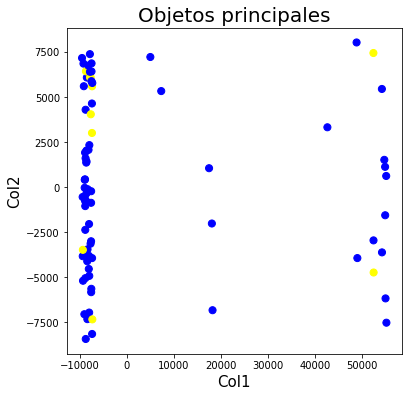

In [ ]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Col1', fontsize= 15)
ax.set_ylabel('Col2', fontsize= 15)
ax.set_title('Objetos principales', fontsize = 20)

color_theme = np.array(["blue", "yellow", "orange", "green", "red"])
ax.scatter(x = pca_nombres_productos.Col1, y = pca_nombres_productos.Col2, c=color_theme[pca_nombres_productos.KMeans_Clusters], s =50)
plt.show()